In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}',format(sys.version))
print('Numpy: {}',format(numpy.__version__))
print('Pandas: {}',format(pandas.__version__))
print('Seaborn: {}',format(seaborn.__version__))
print('scipy: {}',format(scipy.__version__))
print('Sklearn: {}',format(sklearn.__version__))
print('Matplotlib: {}',format(matplotlib.__version__))



Python: {} 3.7.6 (default, Jan  8 2020, 16:21:45) [MSC v.1916 32 bit (Intel)]
Numpy: {} 1.18.1
Pandas: {} 1.0.1
Seaborn: {} 0.10.0
scipy: {} 1.4.1
Sklearn: {} 0.21.1
Matplotlib: {} 3.1.3


In [2]:
#importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#load the dataset from csv file
data = pd.read_csv('creditcard.csv')


In [4]:
#explore the dataset
print(data.columns
    )

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe
     )

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
data = data.sample(frac = 0.1,random_state = 1)
print(data.shape
     )

(2848, 31)


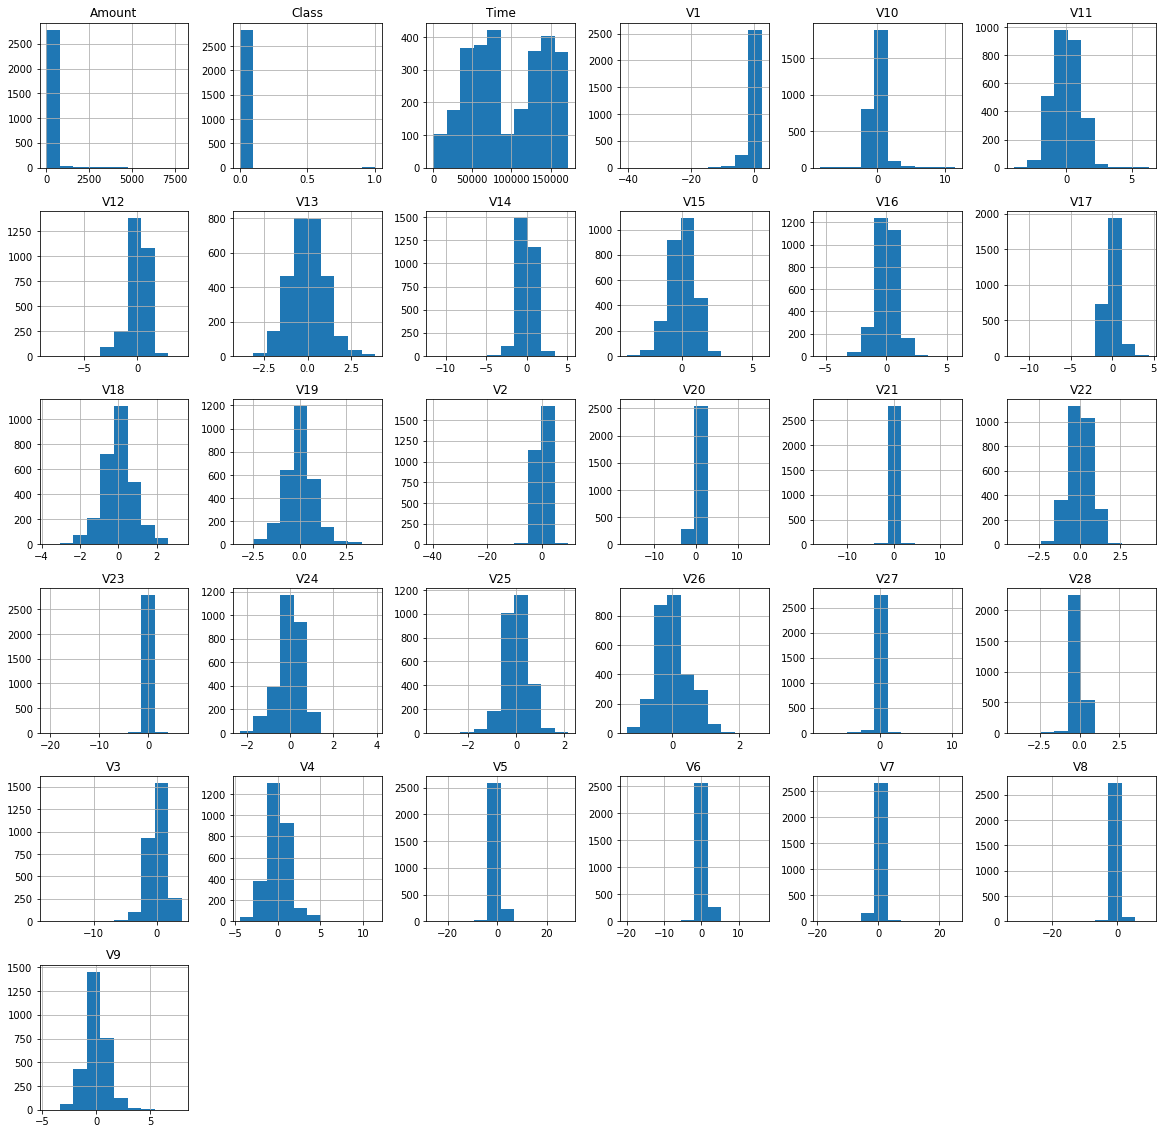

In [9]:
#plot histogram of each para
data.hist(figsize = (20,20))
plt.show()

In [10]:
#determine number of frauds in db
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid)) 

print(outlier_fraction)






0.0017587055926837848


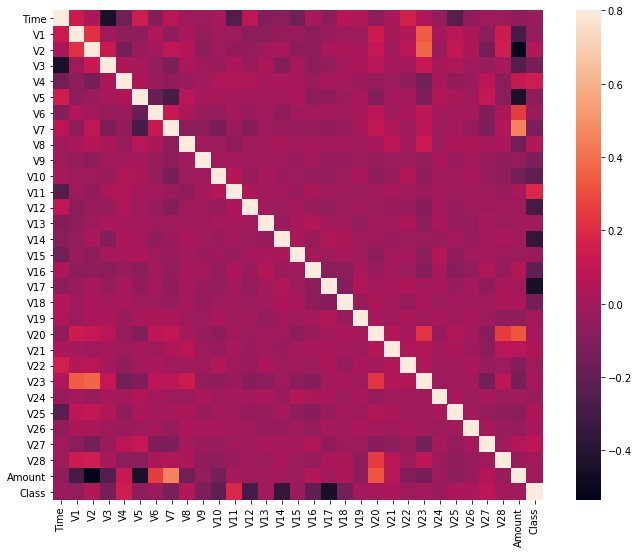

In [11]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
#get all the columns from the dataframe
columns = data.columns.tolist()

#filter the columns to remove data we dont need
columns = [c for c in columns if c not in ["Class"]]

#store the variable we'll be predicting on
target = "Class"
 
X = data[columns]
y = data[target]
print(X.shape)
print(y.shape)





(2848, 30)
(2848,)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
 
#define a random state
state = 1

#defining the outlier detection method
classifiers = {
                "Isolation Forest": IsolationForest(max_samples=len(X),
                                                    contamination = outlier_fraction,
                                                    random_state = state),
                "Local Outlier Factor": LocalOutlierFactor(
                n_neighbors = 20,
                contamination = outlier_fraction )
}




In [1]:
#fit the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Fac":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X) 
        
        
#reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    #run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))




NameError: name 'fraud' is not defined